In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
warnings.filterwarnings('ignore')

In [132]:
df=pd.read_csv('baseball.csv')

In [133]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [134]:
df.shape

(30, 17)

# let w be wins 

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

Following is the features of 2014 baseball stats and the target variable is W.


In [135]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


hence it has no null values

# EDA 

<AxesSubplot:xlabel='W', ylabel='count'>

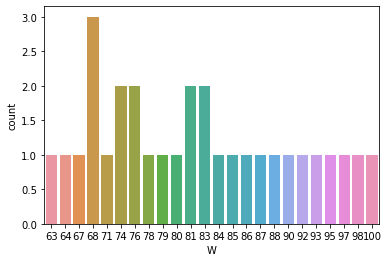

In [137]:
sns.countplot(x='W',data=df)

<AxesSubplot:xlabel='R', ylabel='W'>

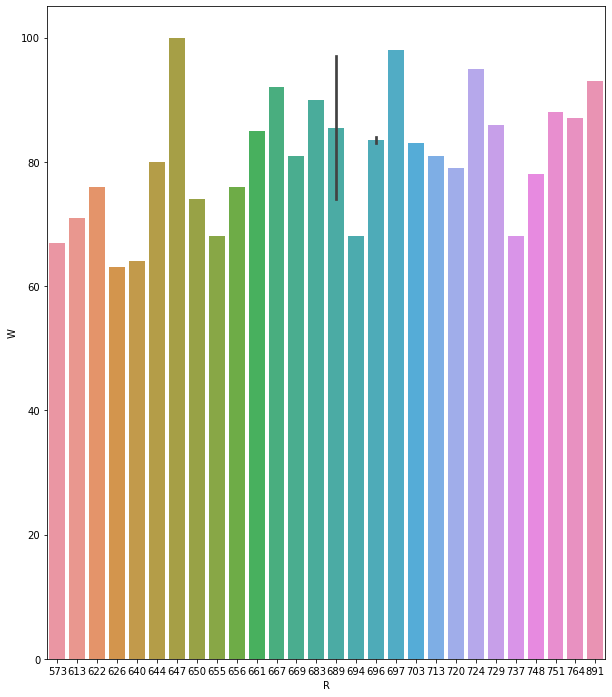

In [138]:
plt.figure(figsize=(10,12))
sns.barplot(x='R',y='W',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

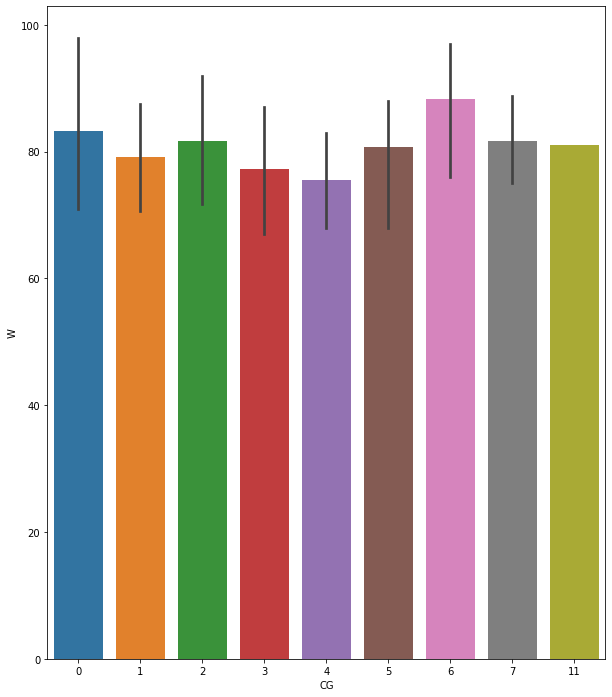

In [139]:
plt.figure(figsize=(10,12))
sns.barplot(x='CG',y='W',data=df)

<AxesSubplot:xlabel='ERA', ylabel='W'>

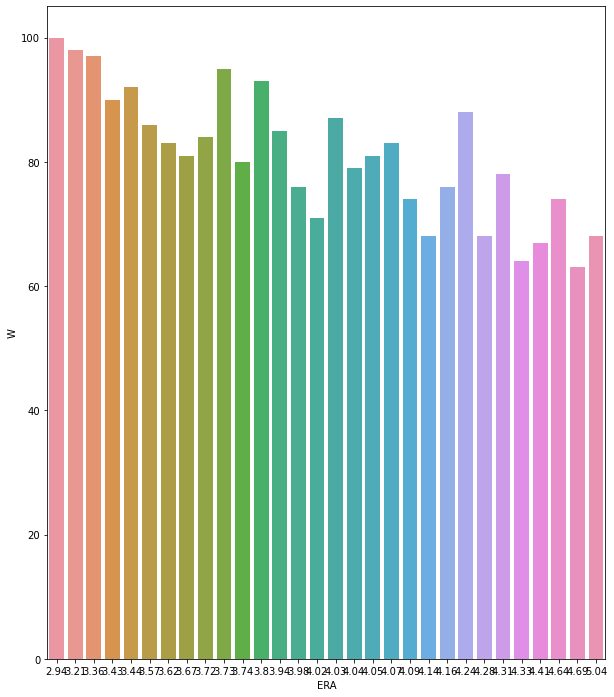

In [96]:
plt.figure(figsize=(10,12))
sns.barplot(x='ERA',y='W',data=df)

<AxesSubplot:xlabel='E', ylabel='W'>

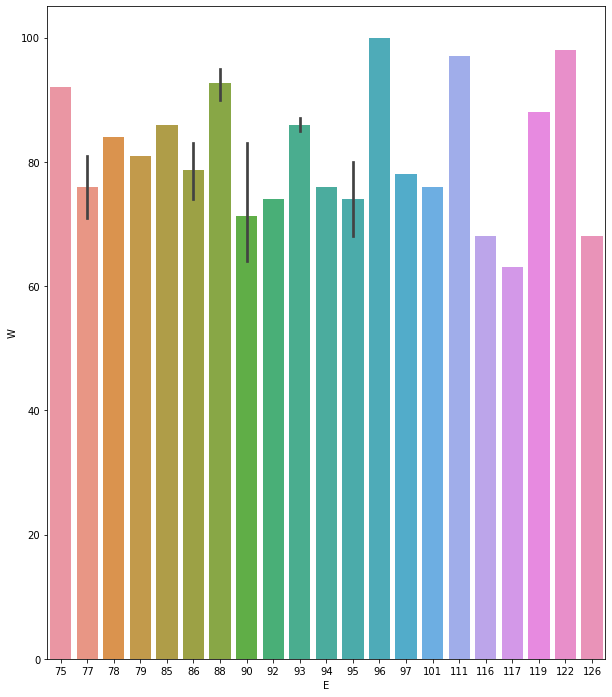

In [97]:
plt.figure(figsize=(10,12))
sns.barplot(x='E',y='W',data=df)

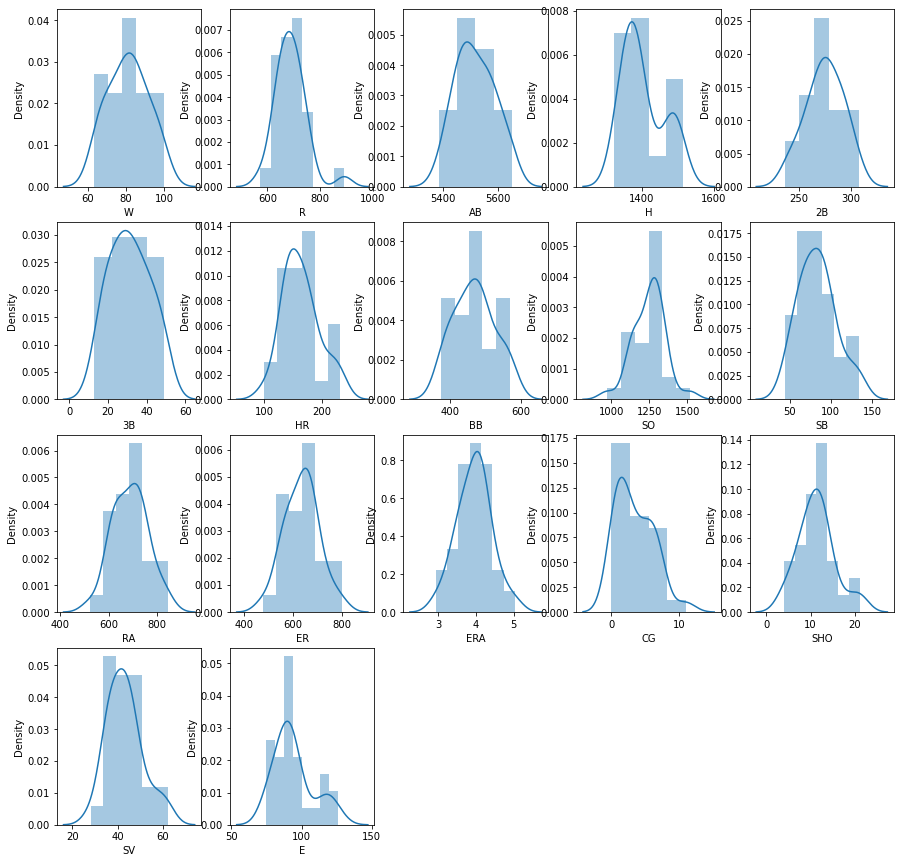

In [140]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in df:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1

plt.show()
    

here we can find that the R,H,so,cg,sho,sv,E is skewed.let us find the negative linearity of the feature

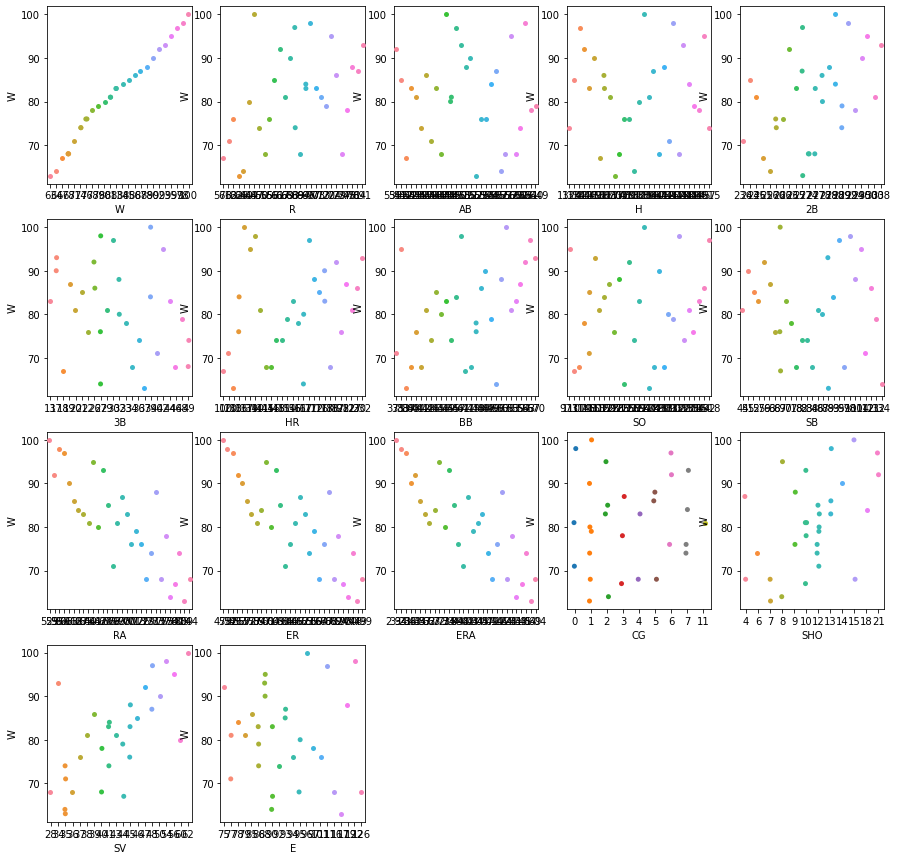

In [141]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in df:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.stripplot(df[i],y='W',data=df)
    plotnumber+=1

plt.show()
    

here we can clearly see that the RA,ER,ERA has negative corr

Let us find the skewness by boxplot

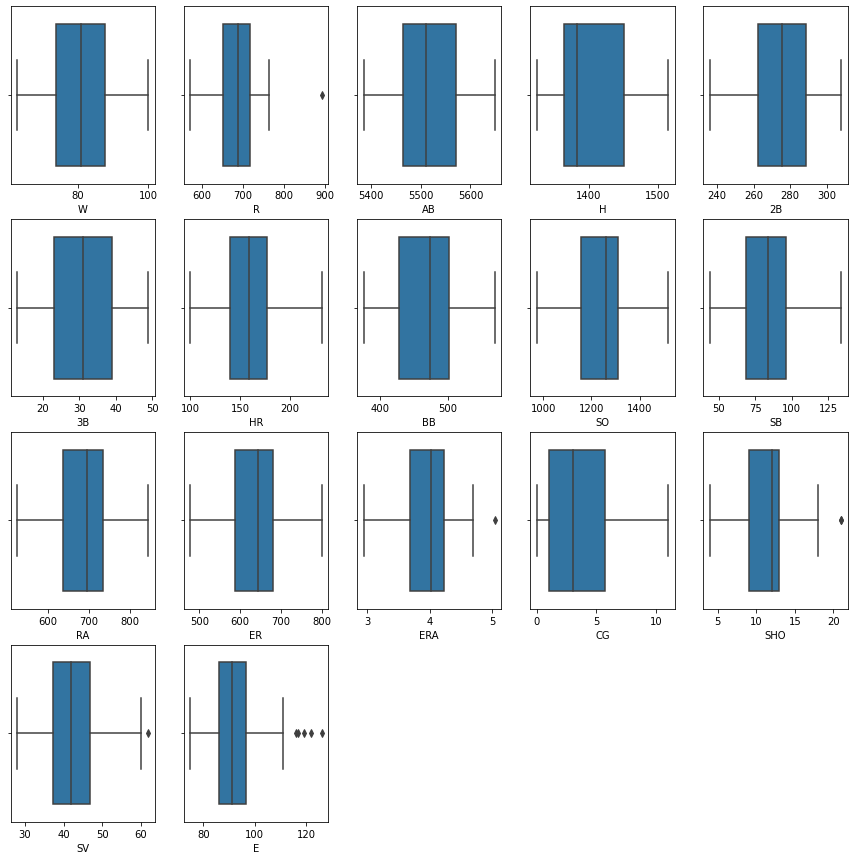

In [101]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in df:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1

plt.show()
    

observations are:
    R has a skewness from 800 to 900
    ERA has b/w 4.5 to 5
    SHO has b/w 18 to 20
    e has b/w 115 to 130

Let us remove the skewness

In [142]:
df=np.sqrt(df)

In [143]:
df.skew()

W     -0.060392
R      0.968676
AB     0.172254
H      0.649567
2B    -0.302835
3B    -0.142922
HR     0.264948
BB     0.053448
SO    -0.348513
SB     0.158381
RA    -0.096160
ER    -0.109548
ERA   -0.133224
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.763487
dtype: float64

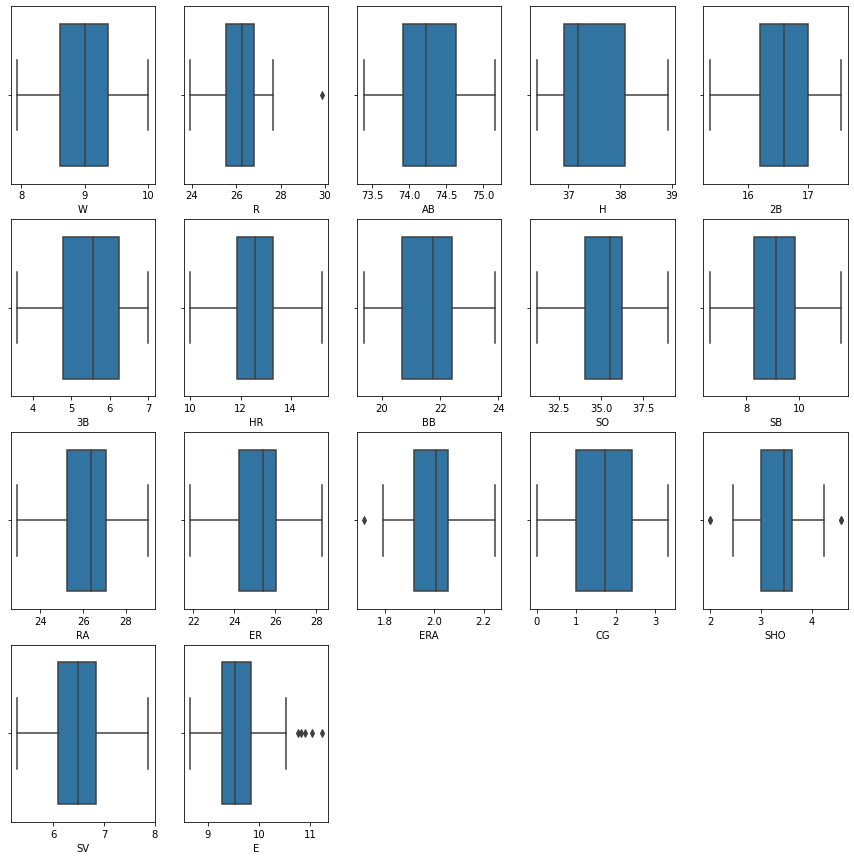

In [144]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in df:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1

plt.show()
    

In [145]:
df.shape

(30, 17)

hence some of skewness has been removed ,let us check if there is any multicolinearity problem exist

<AxesSubplot:>

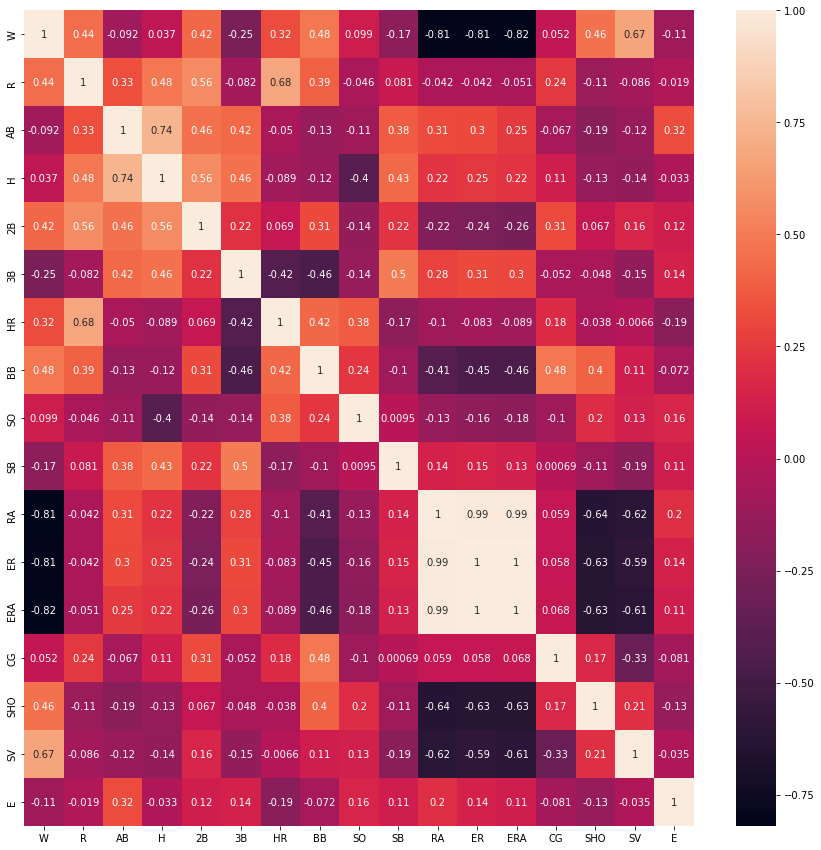

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Seems like E,CG,RA,ERA  have Multicolinearity Problem

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
X=df.drop(['W'],axis=1)
Y=df['W']

In [151]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

Let us find the VIF of features

In [161]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,11.088229,R
1,12.831615,AB
2,8.797727,H
3,4.008464,2B
4,3.067688,3B
5,10.332036,HR
6,3.806142,BB
7,2.727891,SO
8,2.062982,SB
9,194.348197,RA


we could see that 40% of features have more Multicolinearity problems Especially ERA,ER,RA,HR,AB,R will apply PCA and check

In [162]:
from sklearn.decomposition import PCA

In [163]:
pca=PCA()

In [168]:
df_new=pca.fit_transform(x_scaled)

now we want to check the skewness let us covert the components in DF

In [174]:
New_data_pc=pd.DataFrame(df_new,columns=['pc_1','pc_2','pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14','pc_15'])

In [176]:
New_data_pc.shape

(30, 15)

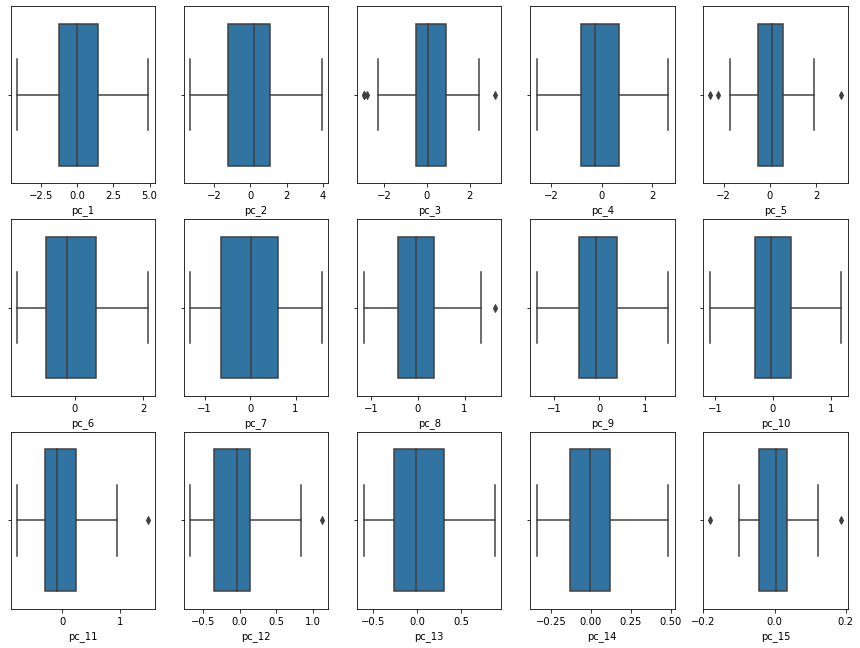

In [178]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in New_data_pc:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(New_data_pc[i])
    plotnumber+=1

plt.show()
    

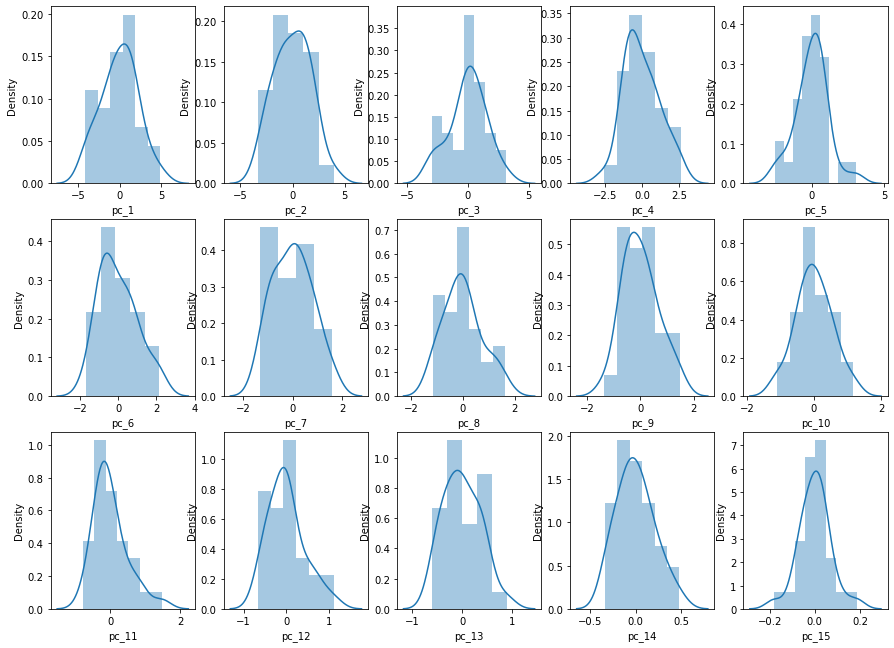

In [179]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in New_data_pc:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(New_data_pc[i])
    plotnumber+=1

plt.show()
    

from above chart we can see that with pca we have removed 90% of skewness and also the distribution looks bit normal ,let us proceed and train the model

In [180]:
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test=train_test_split(New_data_pc,Y,test_size=0.30,random_state=20)

In [187]:
from sklearn.linear_model import LinearRegression

In [189]:
lm=LinearRegression()

In [190]:
lm.fit(x_train,y_train)

LinearRegression()

In [192]:
lm.score(x_train,y_train)

0.9837077624883164

In [193]:
y_pred=lm.predict(x_test)

In [200]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [202]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 0.21168236524513798
MAE: 0.39936562214257854
RMSE: 0.4600895187299293


In [208]:
r2_score(y_test,y_pred)*100

1.8248439343203193

In [214]:
final_data=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})

<AxesSubplot:xlabel='Actual Data', ylabel='Predicted Data'>

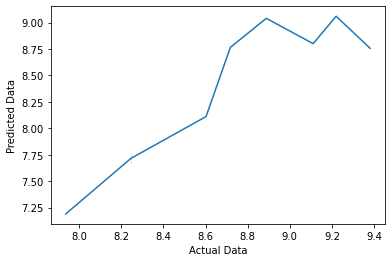

In [215]:
sns.lineplot(x='Actual Data',y='Predicted Data',data=final_data)

In [221]:
filename='Baseball.pickle'
pickle.dump(lm,open(filename,'wb'))
